<a href="https://colab.research.google.com/github/Spica08/deep-learning-from-scratch-5/blob/main/step3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# set up
import os
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# step3 多次元正規分布

## 3.1 Numpyと多次元配列

### 3.1.1 多次元配列
略

### 3.1.2 Numpyの多次元配列
略

### 3.1.3 要素ごとの演算
要素ごとの積 -> アダマール積($\bigodot$)

### 3.1.4 ベクトルの内積と行列積
略

## 3.2 多次元正規分布
step2で扱った正規分布は1つの実数値の分布を対象としていた。次に、複数の実数値であるベクトルに関する正規分布を考える。例えば、身長と体重を以下のようにベクトルとして扱う。  
$x = \begin{pmatrix}
   身長 \\
   体重
\end{pmatrix}$
これにより、Aさんは(170cm, 50kg)のように、各人の測定データが得られる。

### 3.2.1 多次元正規分布の式
ここでは、次の確率変数xを対象にする。  
$x = \begin{pmatrix}
   x_1 \\ x_2 \\ \vdots \\ x_D
\end{pmatrix}$  
xの各要素は、互いに関連するデータ(x1 = 身長、x2 = 体重、...)とする。このとき、xに関する正規分布は次の式で表される。  
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x - \mu)^T \sum\nolimits^{-1}(x - \mu) \right\rbrace}
\end{equation}

ここで$\mu$は平均ベクトル
$\mu = \begin{pmatrix}
   \mu_1 \\ \mu_2 \\ \vdots \\ \mu_D
\end{pmatrix}$、$\sum$は共分散行列
$\sum = \begin{pmatrix}
   \sigma_{11}&\sigma_{12}&\dots&\sigma_{1D}\\
   \sigma_{21}&\sigma_{22}&\dots&\sigma_{2D}\\
   \vdots&\vdots&\ddots&\vdots \\
   \sigma_{11}&\sigma_{12}&\dots&\sigma_{1D}
\end{pmatrix}$を表す。

In [10]:
A = np.array([[1, 2, 3], [1, 3, 5], [2, 3, 5]])
## 転置
print("transpose")
print(A)
print(A.T)

## 行列式
print("determinant")
print(A)
print(np.linalg.det(A))

## 逆行列
print("inverse matrix")
print(A)
print(np.linalg.inv(A))

transpose
[[1 2 3]
 [1 3 5]
 [2 3 5]]
[[1 1 2]
 [2 3 3]
 [3 5 5]]
determinant
[[1 2 3]
 [1 3 5]
 [2 3 5]]
0.9999999999999989
inverse matrix
[[1 2 3]
 [1 3 5]
 [2 3 5]]
[[ 0. -1.  1.]
 [ 5. -1. -2.]
 [-3.  1.  1.]]


### 3.2.2 多次元正規分布の実装
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x - \mu)^T \sum\nolimits^{-1}(x - \mu) \right\rbrace}
\end{equation}

In [13]:
# x : (D, 1) 列ベクトル
# mu : (D, 1) 列ベクトル
# cov : (D, D)
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [15]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.array([[1, 0], [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


## 3.3 2次元正規分布の可視化

### 3.3.1 3Dグラフの描画方法

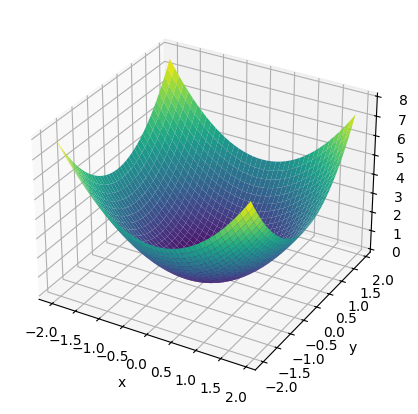

In [22]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(xs, ys)
z = X ** 2 + Y ** 2

fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = {"projection" : '3d'})
ax.plot_surface(X, Y, z, cmap = "viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.show()

### 3.3.2 等高線の描画

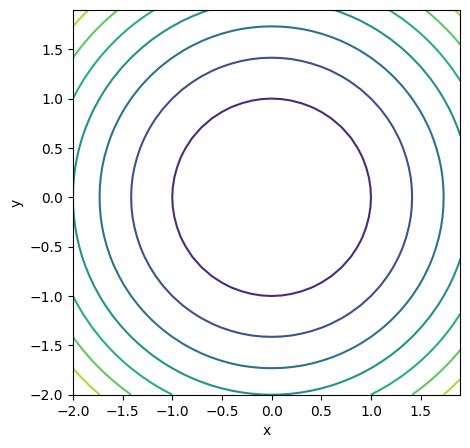

In [23]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(xs, ys)
z = X ** 2 + Y ** 2

fig, ax = plt.subplots(figsize = (5, 5))
ax.contour(X, Y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()

### 3.3.3 2次元正規分布のグラフ

In [24]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])
xs = np.arange(-5, 5, 0.1)
ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

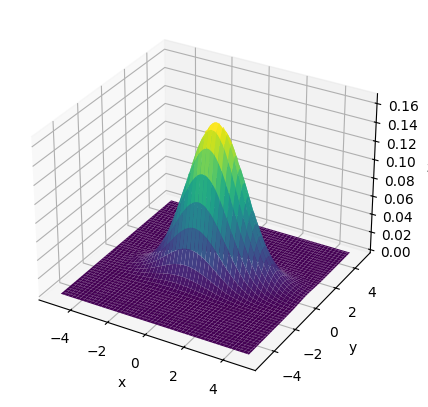

In [25]:
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = {"projection" : '3d'})
ax.plot_surface(X, Y, Z, cmap = "viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.show()

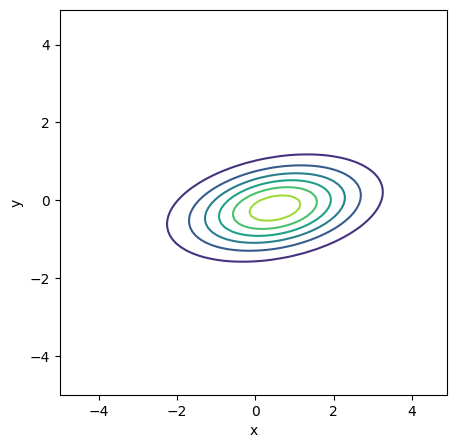

In [26]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.contour(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()

## 3.4 多次元正規分布の最尤推定

### 3.4.1 最尤推定を行う
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x - \mu)^T \sum\nolimits^{-1}(x - \mu) \right\rbrace}
\end{equation}

このD次元のベクトルxの正規分布からサンプル$D = \lbrace x^{(1)}, x^{(2)}, \dots, x^{(n)}\rbrace$が得られた場合を考える。この時このサンプルが得られる確率密度は、  
\begin{align}
p(D;\mu, \sum) &= \mathcal{N}(x^{(1)};\mu, \sum)\mathcal{N}(x^{(2)};\mu, \sum)\dots\mathcal{N}(x^{(N)};\mu, \sum) \\
               &= \prod_{n = 1}^{N}\mathcal{N}(x^{(n)};\mu, \sum)
\end{align}
と表される。この$p(D;\mu, \sum)$を最大にするパラメータを求めるが、計算の都合上対数尤度$L(\mu, \sum) = logp(D;\mu, \sum)$を考える。  
尤度が最大となる場所は、以下の式を解くことで求められる。  
\begin{equation}
\frac{\partial{L}}{\partial\mu} = 0  \\
\frac{\partial{L}}{\partial\sum} = 0
\end{equation}

\begin{align}
log p(D;\mu, \sum) &= log \prod_{n = 1}^{N}\mathcal{N}(x^{(n)};\mu, \sum) \\
                   &= log \prod_{n = 1}^{N}\frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= \sum_{n = 1}^{N}log\frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= \sum_{n = 1}^{N}log\frac{1}{\sqrt{(2\pi)^D|\sum|}} + \sum_{n = 1}^{N}log exp{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= -Nlog{\sqrt{(2\pi)^D|\sum|}} + \sum_{n = 1}^{N}{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= -\frac{N}{2}log(2\pi)^D - \frac{N}{2}log{|\sum|} - \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}
\end{align}

#### 3.4.1.A $\mu$の最尤推定

##### 3.4.1.A.1 2次形式の微分
$\mu$の最尤推定に必要な以下の式の導出を行う。  
\begin{equation}
\frac{\partial}{\partial \mu} = ((x - \mu)^T\sum\nolimits^{-1}(x - \mu)) = -2\sum\nolimits^{-1}(x - \mu)
\end{equation}

まず、より単純な問題として2次形式$z^TAz$について考える(zは列ベクトルとする)。結果は1 x 1の行列(スカラー)となる。Aのi行j列目の要素を$A_{ij}$とすると、  
\begin{align}
x^TAx &= z^T(Az)\\
      &= \sum_{i = 1}^D z_i\begin{pmatrix}
                        \sum_{j = 1}^D a_{ij}z_j
                        \end{pmatrix}\\
      &= \sum_{i = 1}^D \sum_{j = 1}^D a_{ij}z_iz_j
\end{align}